# Binary classification & Error metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
#load data
df = pd.read_csv('C:/Users/suresha.bc/Desktop/classfication/dataset/5_not_5_dataset.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NOT-5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#check missing values
df.isnull().any()[df.isnull().any()==True]

Series([], dtype: bool)

In [17]:
#shape of dataset.
df.shape

(42000, 785)

In [18]:
#check if dataset is balanced
#it's clarely evident, the dataset si imbalanced.
df['label'].value_counts()


NOT-5    38205
5         3795
Name: label, dtype: int64

In [27]:
#Split into X & y variables
X = df.iloc[:,1:]
y = df['label']

In [30]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
#convert categorical lable to numeric.
y_train = y_train.apply(lambda x : 1 if x=='5' else 0)


In [39]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
minMaxScale = MinMaxScaler()
X_train = minMaxScale.fit_transform(X_train)

In [50]:
#model fit
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state=3, loss='log')
clf.fit(X_train,y_train)

SGDClassifier(loss='log', random_state=3)

In [51]:
#Performing well on train set
from sklearn.metrics import accuracy_score
accuracy_score(y_train,clf.predict(X_train))

0.9690178571428572

In [52]:
#Prepare test set
X_test = minMaxScale.transform(X_test)
y_test = y_test.apply(lambda x:1 if x=='5' else 0)

In [53]:
#Test on test set.
accuracy_score(y_test,clf.predict(X_test))

0.9697619047619047

# lt looks like model is performing well 
##But accuracy might be mis leading
##Accuray is not a goo metrcis on imbalance dataset.

# Confusion metrics gives a clear picture


In [61]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
conf_matrix = confusion_matrix(y_train,clf.predict(X_train))
prec = precision_score(y_train,clf.predict(X_train))
recall = recall_score(y_train,clf.predict(X_train))
f1 = f1_score(y_train,clf.predict(X_train))

print('Confusion matrix: ')
print(conf_matrix)
print('Precision: ',prec)
print('Recall: ',recall)
print('F1_score: ',f1)

Confusion matrix: 
[[30415    92]
 [  949  2144]]
Precision:  0.9588550983899821
Recall:  0.6931781441965729
F1_score:  0.8046537811972226


# #F1-score
F1-Score is a combination of Precision and Recall. F1-Score is a harmonic mean of precision and recall (harmonic mean gives more weight to low value). 

F1-Score is a simple way to compare two classifiers.

# Calcualting probabilites

In [64]:
#Sum of probabilities of classes is equal to 1.
np.sum(clf.predict_proba(X_train),axis=1,keepdims=True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

# Calculating decision scores.

In [66]:
Decision_scores = clf.decision_function(X_train)
print(Decision_scores)

[-11.59028811   6.07212633  -4.79174524 ... -14.07950665  -7.08600214
  -2.55447901]


# Example on playing with thresold 

 Precision recall thresold
 
 we can play with Decision score thresold to adjust precision and recall as per business.

In [70]:
decision_score_thresold = clf.decision_function(X_train)>=-.21
print('Precision score: ',precision_score(y_train,decision_score_thresold))
print('Recall score: ',recall_score(y_train,decision_score_thresold))

Precision score:  0.9526854219948849
Recall score:  0.7225994180407371


In [73]:
decision_score_thresold = clf.decision_function(X_train)>=-.71
print('Precision score: ',precision_score(y_train,decision_score_thresold))
print('Recall score: ',recall_score(y_train,decision_score_thresold))

Precision score:  0.9271548436308161
Recall score:  0.7859683155512448


# Precision recall trade off

In [85]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train,Decision_scores)

In [86]:
print(precision.shape)
print(recall.shape)
print(thresolds.shape)

(32675,)
(32675,)
(32674,)


(array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.]),
 <a list of 8 Text major ticklabel objects>)

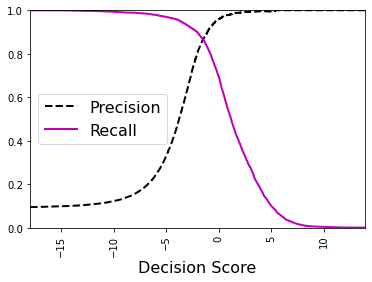

In [87]:
plt.plot(thresholds, precisions[:-1], "k--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "m-", label="Recall", linewidth=2)
plt.xlabel("Decision Score", fontsize=16)
plt.legend(loc="center left", fontsize=16)
plt.xlim([np.min(thresholds), np.max(thresholds)])
plt.ylim([0, 1])
plt.xticks(rotation=90)

# Precision-Recall Curve:
  * One should prefer the Precision-Recall curve whenever the positive class is rare (as in the '5', 'NOT-5' dataset)
  * Area under the curve is high, the model is working good.
  * Precision-Recall Curve is drawn for "Precision" and "Recall" scores found at different thresholds.

(0.0, 1.0, 0.0, 1.0)

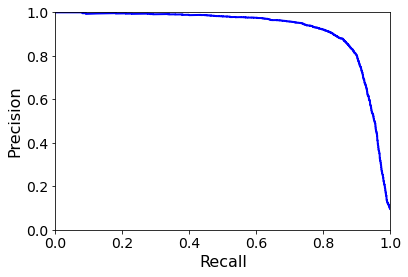

In [89]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])

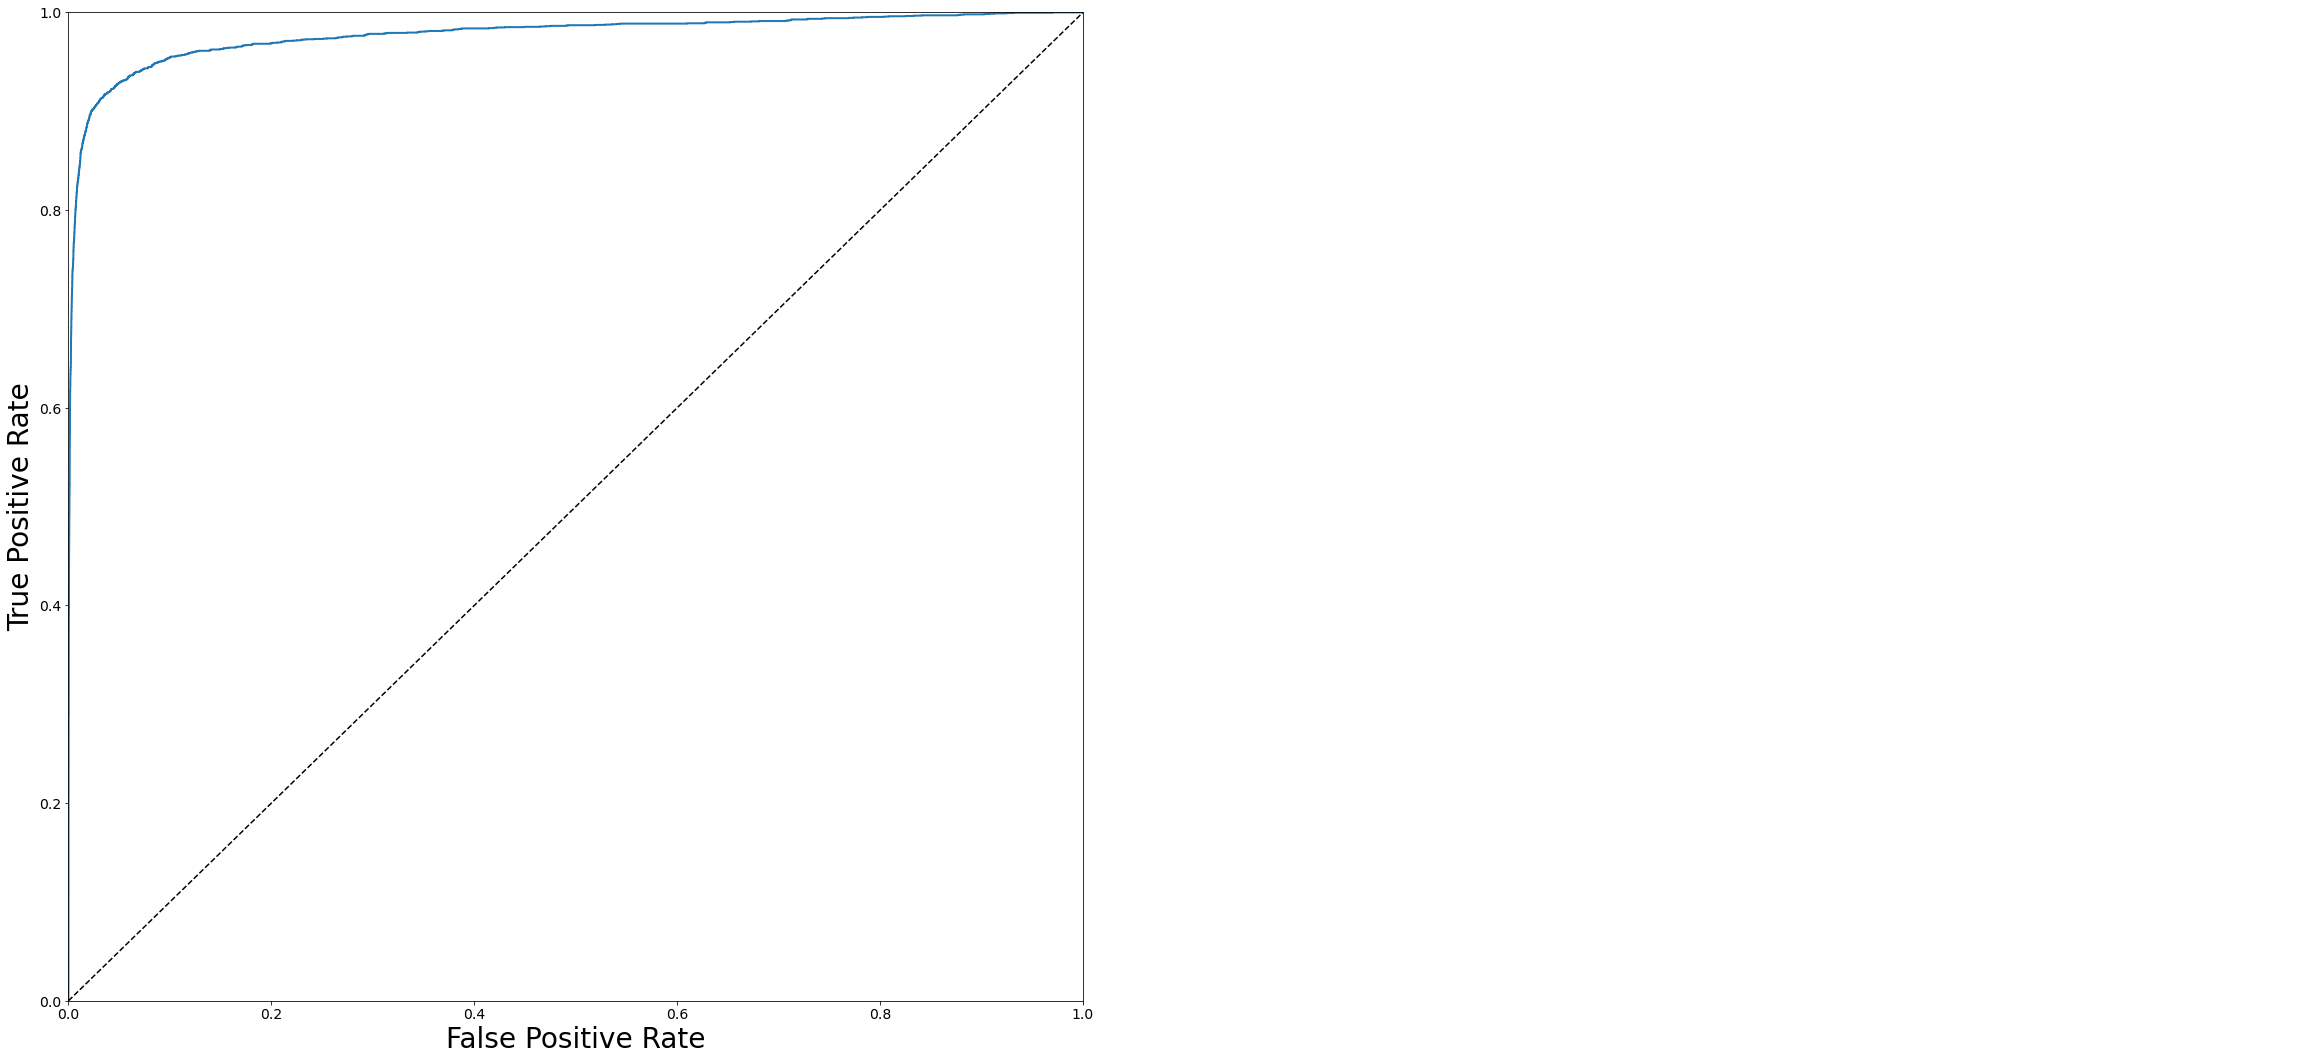

In [91]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, Decision_scores)

plt.figure(figsize=(40,40))
plt.subplot(2,2,1)

plt.rcParams['xtick.labelsize'] = 26
plt.rcParams['ytick.labelsize'] = 26
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=28)
plt.ylabel('True Positive Rate', fontsize=28)
plt.subplot(2,2,2)
plt.axis("off")
plt.show()